## Experiments

The group experimented on NSMR model and LSTUR model. Both models are from Microsoft Recommenders repository. The models are implemented with Tensorflow and Keras API. Following the definitions in the paper, the models are implemented with different user encoders and news encoders. The training model is `model` and the testing model is `scorer`. The most significant difference between them is that the training models include a `TimeDistributed` layer. This allows the model to apply the same layer onto data points in a time series. 

The training file we have are the news and behavior tables. For validation, we will input the user’s browsing history and a list of news. We will rank the given news by the probability of the user’s clicking. The predictions are then compared with the user’s behavior and some metrics are calculated. It’s important to notice that we are not selecting the news list for users, rather, we are only ranking them with the probability of clicking.


In the training process, entropy loss is used to calculate the loss and update the network. In the testing process, there are two methods: `fast_eval` function and `slow_eval` function. The `slow_eval` function uses the whole trained model to make predictions from `sigmoid` function, so the outputs are in the same format as the training results. The cons of the method is that it consumes much more time when doing the fitting end to end. The `fast_eval` function fits the user encoder and news encoder on the test files directly, then the results are combined using dot product. This was makes the evaluation pretty fast, but the outputs will not be bounded into 0 and 1, so we cannot calculate the cross entropy loss from the results. Instead, we can use other metrices to evaluate the results.

Since the performance of the user is either clicked or not, we can achieve this as a binary classification problem. For labels of the items are either ‘0’ or ‘1’.  Therefore, we can use the metrics for classification problems to evaluate our results. In this experiment, we are measuring the group AUC of the test set. Since our results will rank the given list of news, both mrr(mean reciprocal rank) and ndcg will be used to evaluate the results of the ranked query. 


The dataset we used is the full dataset from MIND dataset. The title words and abstract words are tokenized and converted into indexes. A pretrained word embedding matrix is generated from the existing words in training word dictionary and word vectors. The matrix is used as the initial weight of embedding layers. Besides the training and validation dataset, we are using a new test data to report the final results.

For NMRS model, the initial weights give a score of {'group_auc': 0.517, 'mean_mrr': 0.2221, 'ndcg@5': 0.2296, 'ndcg@10': 0.2914} and for LUSTR model, the initial weights give a score of {'group_auc': 0.519, 'mean_mrr': 0.2209, 'ndcg@5': 0.2286, 'ndcg@10': 0.2908}. The two initial scores are pretty similar. The LSTUR model is giving a higher score, one possible reason of which is that the model takes both words from titles and the abstracts while the NSMR model uses only the words from titles.

We used different training settings in the exploration of the model. First, we set epoch number to 50 and learning rate set to 0.0001. We got the loss versus epoch graph as the figure below. The loss decreases smoothly but is not converging with 50 epochs. When examining the gauc of the validation results, we see the gauc increases as the epoch ends. To achieve convergence of model, we increased learning rate to 1e-4. This time the training loss have a more obious trend of low learning rate. However, the gauc shows signs of decreasing after 10 epochs. At the end of 50 epochs, LSTUR has a much lower training loss compared with NRMS, but the gauc of both models are close.When we increase the learning rates to 3e-4, the training loss converges at the end of 50 epochs. However, LSTUR is having a better curve fitted to the data. In gauc graph, both models have a sharp decrease, while NRMS is more obvious than the other. The same trend also appears in the other metrices. After 10 epochs, all the evaluation scores decrease. This can be a sign of overfitting of the model. 

In [1]:
import matplotlib.pyplot as plt

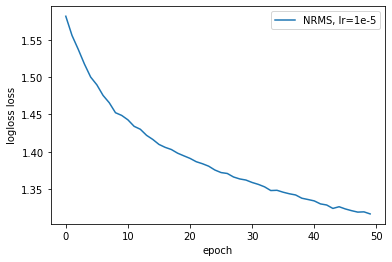

In [2]:
with open('nrms_loss_lr.txt', 'r') as f:
    content = f.readlines()

train_loss=[float(content[i].strip()) for i in range(50)]

plt.plot(train_loss, label='NRMS, lr=1e-5')

plt.xlabel('epoch')
plt.ylabel('logloss loss')
plt.legend()
plt.show()


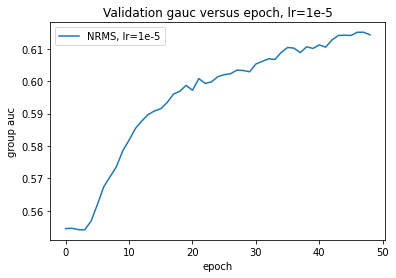

In [34]:
val_metric=content[50:-1]
val_loss_gauc=[float(item.split(',')[0].split(':')[1]) for item in val_metric]
val_loss_gauc

plt.plot(val_loss_gauc, label='NRMS, lr=1e-5')

plt.xlabel('epoch')
plt.ylabel('group auc')
plt.title('Validation gauc versus epoch, lr=1e-5')
plt.legend()
plt.show()

In [4]:
with open('nrms_loss.txt', 'r') as f:
    content1 = f.readlines()

train_loss1=[float(content1[i].strip()) for i in range(50)]
with open('lstur_loss.txt', 'r') as f2:
    content2 = f2.readlines()
train_loss2=[float(content2[i].strip()) for i in range(50)]


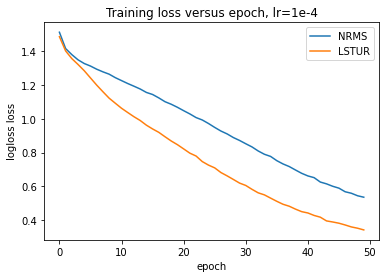

In [5]:
plt.plot(train_loss1, label='NRMS')

plt.plot(train_loss2, label='LSTUR')

plt.xlabel('epoch')
plt.ylabel('logloss loss')
plt.title('Training loss versus epoch, lr=1e-4')
plt.legend()
plt.show()

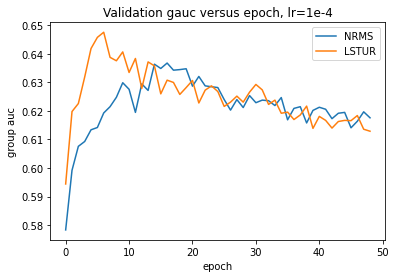

In [6]:
val_metric1=content1[50:-1]
val_loss_gauc1=[float(item.split(',')[0].split(':')[1]) for item in val_metric1]
val_loss_gauc1

val_metric2=content2[50:-1]
val_loss_gauc2=[float(item.split(',')[0].split(':')[1]) for item in val_metric2]
val_loss_gauc2

plt.plot(val_loss_gauc1, label='NRMS')
plt.plot(val_loss_gauc2, label='LSTUR')

plt.title('Validation gauc versus epoch, lr=1e-4')

plt.xlabel('epoch')
plt.ylabel('group auc')
plt.legend()
plt.show()

In [7]:

with open('lstur_loss_lr3e-4.txt', 'r') as f:
    content3 = f.readlines()       
train_loss3=[float(item) for item in content3[0:50]]


with open('nrms_loss_lr3e-4.txt', 'r') as f:
    content4 = f.readlines()       
train_loss4=[float(item) for item in content4[0:50]]


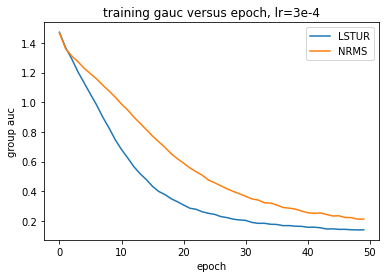

In [8]:
plt.plot(train_loss3, label='LSTUR')
plt.plot(train_loss4, label='NRMS')

plt.title('training gauc versus epoch, lr=3e-4')

plt.xlabel('epoch')
plt.ylabel('group auc')
plt.legend()
plt.show()

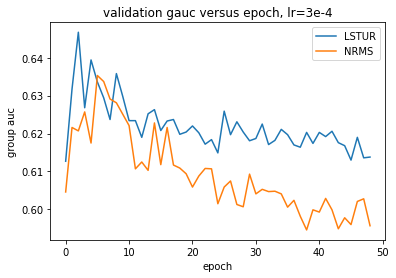

In [9]:
val_loss3=[float(item.split(',')[0].split(':')[1]) for item in content3[50:-1]]
val_loss4=[float(item.split(',')[0].split(':')[1]) for item in content4[50:-1]]

plt.plot(val_loss3, label='LSTUR')
plt.plot(val_loss4, label='NRMS')

plt.title('validation gauc versus epoch, lr=3e-4')

plt.xlabel('epoch')
plt.ylabel('group auc')
plt.legend()
plt.show()

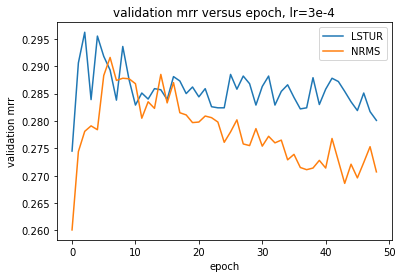

In [10]:
val_mrr3=[float(item.split(',')[1].split(':')[1]) for item in content3[50:-1]]
val_mrr4=[float(item.split(',')[1].split(':')[1]) for item in content4[50:-1]]

plt.plot(val_mrr3, label='LSTUR')
plt.plot(val_mrr4, label='NRMS')

plt.title('validation mrr versus epoch, lr=3e-4')

plt.xlabel('epoch')
plt.ylabel('validation mrr')
plt.legend()
plt.show()

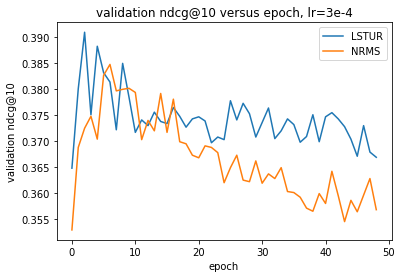

In [11]:
val_ndcg3=[float(item.split(',')[3].split(':')[1][0:-2]) for item in content3[50:-1]]
val_ndcg4=[float(item.split(',')[3].split(':')[1][0:-2]) for item in content4[50:-1]]

plt.plot(val_ndcg3, label='LSTUR')
plt.plot(val_ndcg4, label='NRMS')

plt.title('validation ndcg@10 versus epoch, lr=3e-4')

plt.xlabel('epoch')
plt.ylabel('validation ndcg@10')
plt.legend()
plt.show()

To further explore the results of the model, we are looking into the prediction results. Here we attached two prediction results from the model. On the top we have the list of given news and the user's behavior, and on the bottom the prediction of orders of the news. 

In the first example, the true positive results are result 2 and 13. In the prediction, these two results are at the beginning of the list, which is a good sign. However, in the second example, the only positive click is the first news, while that is at the end of the prediction list. 

This inconsistency can be caused by the sparsity of the data as introduced in the EDA part. The training sets have very sparse clicks as well, so the model may be overfitting the training data, then the performance of validation will decrease even if the training converges. 

In [27]:
import csv

tsv_file = open('data/valid/behaviors.tsv')
read_tsv=csv.reader(tsv_file,delimiter="\t")

test_user=[]
for row in read_tsv:
    test_user.append(row)

prediction=open('prediction_nrms.txt','r').read().split('\n')

In [29]:
print((test_user[3][4].split()))
print(prediction[3])

['N20150-0', 'N1807-1', 'N26916-0', 'N28138-0', 'N9576-0', 'N19737-0', 'N24553-0', 'N25605-0', 'N21325-0', 'N21852-0', 'N23475-0', 'N26508-0', 'N16798-1']
4 [13,7,11,9,2,4,12,8,1,3,5,10,6]


In [30]:
print((test_user[10][4].split()))
print(prediction[10])

['N9576-1', 'N21852-0', 'N23829-0', 'N23475-0', 'N3963-0', 'N27833-0', 'N13670-0', 'N26916-0', 'N26508-0', 'N28138-0', 'N8767-0']
11 [3,5,9,7,2,10,6,11,1,4,8]


In the next step of experiments, we can apply some strategies to eliminate overfitting of the model. In our case, we are using a very large dataset, so to avoid overfitting we cannot simply increase the data size. Rather, for example, we can either use weight decay methods to regularize the model, or we can decrease the complexity of the model. We can also try to decrease the spasity of the data, since that can also be causing overfitting. From both methods, we can try to increase the performance of the predictions of user clicking on the dataset.

Code for evaluating the model:

In [16]:
import sys
sys.path.append("../../")
import os
import numpy as np
import zipfile
from tqdm import tqdm
from tempfile import TemporaryDirectory
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from iterator import MINDIterator
from utils import prepare_hparams
from utils import get_mind_data_set
from model import NRMSModel
from model import LSTURModel
from layer import cal_metric
iterator = MINDIterator
seed=40

In [18]:
hparams_nrms = prepare_hparams('data/utils/nrms.yaml', 
                          wordEmb_file='data/utils/embedding.npy',
                          wordDict_file='data/utils/word_dict.pkl', 
                          userDict_file='data/utils/uid2index.pkl',
                          batch_size=32,
                          show_step=10)

In [19]:
hparams_lstur = prepare_hparams('data/utils/lstur.yaml', 
                          wordEmb_file='data/utils/embedding_all.npy',
                          wordDict_file='data/utils/word_dict_all.pkl', 
                          userDict_file='data/utils/uid2index.pkl',
                          batch_size=32,
                          show_step=10)

In [35]:
model_nrms = NRMSModel(hparams_nrms, iterator, seed=seed)


Tensor("conv1d_1/Relu:0", shape=(?, 30, 400), dtype=float32)
Tensor("att_layer2_5/Sum_1:0", shape=(?, 400), dtype=float32)


In [ ]:
model_nrms.model.summary()

In [ ]:
model_nrms.scorer.summary()

In [21]:

pretrianed_metric,pretrianed_labels, pretrianed_preds=model_nrms.run_eval('data/valid/news.tsv', 'data/valid/behaviors.tsv')
print(pretrianed_metric)

586it [00:02, 222.40it/s]
236it [00:40,  5.80it/s]
7538it [00:01, 4032.97it/s]


{'group_auc': 0.517, 'mean_mrr': 0.2221, 'ndcg@5': 0.2296, 'ndcg@10': 0.2914}


In [22]:
status_nrms=model_nrms.scorer.load_weights(tf.train.latest_checkpoint("./data/nrms_3e-4/")).assert_existing_objects_matched()
status_nrms


In [23]:
trained_metrices_nrms, group_labels_nrms, group_preds_nrms=model_nrms.run_eval('data/valid/news.tsv', 'data/valid/behaviors.tsv')
print(trained_metrices_nrms)

586it [00:02, 290.14it/s]
236it [00:38,  6.11it/s]
7538it [00:01, 4088.95it/s]


{'group_auc': 0.6005, 'mean_mrr': 0.2733, 'ndcg@5': 0.2977, 'ndcg@10': 0.3595}


In [24]:
model_lstur = LSTURModel(hparams_lstur, iterator, seed=seed)

pretrianed_metric_lstur,pretrianed_labels_lstur, pretrianed_preds_lstur, =model_lstur.run_eval('data/valid/news.tsv', 'data/valid/behaviors.tsv')
print(pretrianed_metric_lstur)

Tensor("conv1d/Relu:0", shape=(?, 30, 400), dtype=float32)
Tensor("att_layer2_2/Sum_1:0", shape=(?, 400), dtype=float32)


586it [00:02, 214.75it/s]
236it [00:27,  8.54it/s]
7538it [00:01, 3852.70it/s]


{'group_auc': 0.519, 'mean_mrr': 0.2209, 'ndcg@5': 0.2286, 'ndcg@10': 0.2908}


In [25]:
status_lstur=model_lstur.model.load_weights(tf.train.latest_checkpoint("./data/lstur_3e-4/")).assert_existing_objects_matched()
status_lstur


In [26]:
trained_metrices_lstur, group_labels_lstur, group_preds_lstur=model_lstur.run_eval('data/valid/news.tsv', 'data/valid/behaviors.tsv')
print(trained_metrices_lstur)

586it [00:01, 334.21it/s]
236it [00:26,  8.79it/s]
7538it [00:01, 4078.20it/s]


{'group_auc': 0.6108, 'mean_mrr': 0.2798, 'ndcg@5': 0.3026, 'ndcg@10': 0.3654}
